Importing the libraries

In [1]:
#data analysis
import os
import pandas as pd
import numpy as np

#machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from imblearn.over_sampling import SMOTE


#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Dataset

In [4]:
os.chdir(r"/content/drive/MyDrive/wine_data")
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Preprocessing the Dataset

In [8]:
#Checking for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
df.loc[:,df.isnull().any()].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates'],
      dtype='object')

In [10]:
#Replacing Null Values with Median
x=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates']
for i in x:
    df[i]=df[i].fillna(df[i].median())

In [11]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

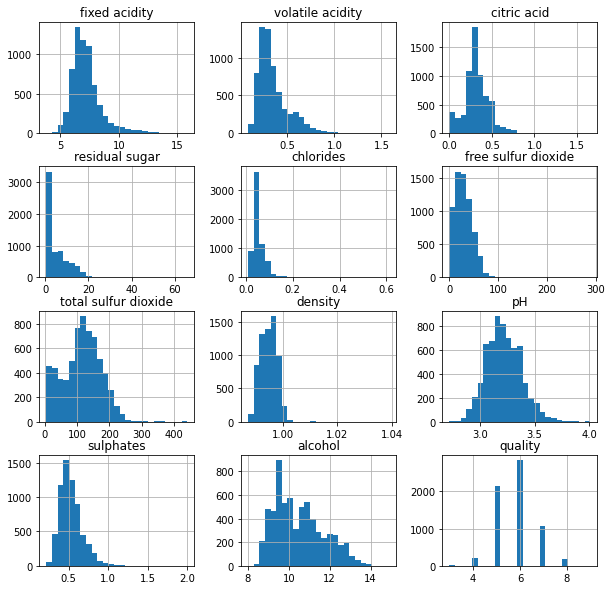

In [12]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

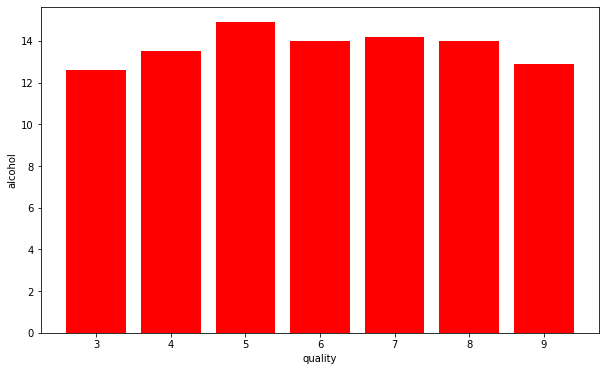

In [13]:
plt.figure(figsize=[10,6])
# plotting bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

# Coorelation Matrix

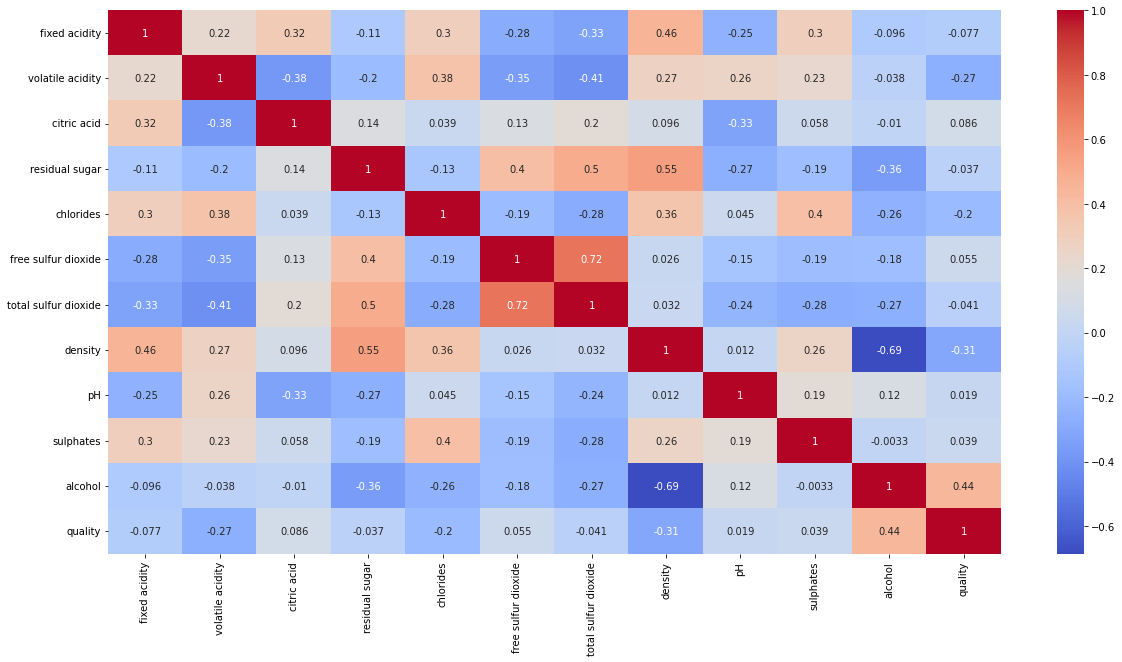

In [14]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [15]:
#Filtering the columns having coorelation > 0.7
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [16]:
#Dropping the column
df=df.drop('total sulfur dioxide',axis=1)

In [17]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [18]:
#Handling Categorical Variable
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [19]:
x=df[df.columns[1:12]]
y=df['type']

In [20]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [22]:
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
X_train = norm_fit.transform(X_train)
X_test = norm_fit.transform(X_test)
# display values
print(X_train)

[[0.34710744 0.1        0.22289157 ... 0.14044944 0.26086957 0.16666667]
 [0.20661157 0.18       0.15662651 ... 0.15168539 0.11594203 0.33333333]
 [0.24793388 0.06666667 0.18072289 ... 0.16853933 0.14492754 0.66666667]
 ...
 [0.33884298 0.38666667 0.         ... 0.20224719 0.2173913  0.33333333]
 [0.24793388 0.34       0.06024096 ... 0.25280899 0.24637681 0.33333333]
 [0.19008264 0.16666667 0.19277108 ... 0.24157303 0.2173913  0.33333333]]


In [23]:
#Machine Learning Models
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

acc=[]
nam=[]

for name,model in models:
  kfold=KFold(n_splits=10) 
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : accuracy:{}( standard deviation:{})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))
  acc.append(cross_val_sc.mean()*100)
  nam.append(name)


lr : accuracy:0.9730613606047133( standard deviation:0.009273108093936519)
decision tree : accuracy:0.9749862902030533( standard deviation:0.009501276126348693)
svm : accuracy:0.9732532977619683( standard deviation:0.009133345743187957)
knn : accuracy:0.9792189121090855( standard deviation:0.005695375003414089)
naive bayes : accuracy:0.9590162294353046( standard deviation:0.006317031947495189)
Random Forest : accuracy:0.9898028753520084( standard deviation:0.007300698131674695)


From the above, it can be seen that each of the model is giving more than 95% Accuracy due to imbalanced Data

In [29]:
df['type'].value_counts()


1    4898
0    1599
Name: type, dtype: int64

Since, the data is imbalanced, resampling the data using SMOTE from imblearn library and re -checking the Accuracy.

In [25]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3924
Before OverSampling, counts of label '0': 1273 

After OverSampling, the shape of train_X: (7848, 11)
After OverSampling, the shape of train_y: (7848,) 

After OverSampling, counts of label '1': 3924
After OverSampling, counts of label '0': 3924


In [26]:
#Re-fitting the data to various Machine Learning Models and checking the Accuracy.
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

acc=[]
nam=[]

for name,model in models:
  kfold=KFold(n_splits=10) 
  cross_val_sc=cross_val_score(model,x_train_res, y_train_res,scoring='accuracy',cv=kfold)
  print('{} : accuracy:{}( standard deviation:{})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))
  acc.append(cross_val_sc.mean()*100)
  nam.append(name)

lr : accuracy:0.9765544975952164( standard deviation:0.004529224185176129)
decision tree : accuracy:0.982163330300273( standard deviation:0.0065670010250296305)
svm : accuracy:0.9764274340309372( standard deviation:0.005289505588856107)
knn : accuracy:0.9817821396074352( standard deviation:0.008620119109653823)
naive bayes : accuracy:0.9596085727284545( standard deviation:0.004993209467403157)
Random Forest : accuracy:0.9928646171844534( standard deviation:0.002683782249078592)


From the above, it can be seen that Random Forest Classifier is giving highest Accuracy. Hence, Training the Model with Random Forest Classifier. 

In [27]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train_res, y_train_res)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9869230769230769


In [28]:
confusion_matrix(y_test, y_pred)

array([[316,  10],
       [  7, 967]])